In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [3]:
df = pd.read_csv('/content/BasketBallRevised - basketball_cleaned.csv')

In [4]:
df.head()

,Player,YearsInLeague,GamesPlayed,MinutesPlayed,FieldGoal,FieldGoalAttempt,3PointsMade,3PointAttempts,FreeThrow,FreeThrowAttempts,...,FieldGoal%,3Pointer%,FreeTthrow%,MinutesPlayedPerGame,MinutesPlayedPerGame.1,TotalReboundsPerGames,AssitPerGame,BirthDate,BirthCity,BirthState
0,Keith Askins,9,486,7983,677,1688,275,774,223,311,...,0.401,0.355,0.717,16.4,3.8,2.9,0.8,"Dec 15, 1967",Athens,Alabama
1,Charles Barkley*,16,1073,39330,8435,15605,538,2020,6349,8643,...,0.541,0.266,0.735,36.7,22.1,11.7,3.9,"Feb 20, 1963",Leeds,Alabama
2,Eric Bledsoe,7,380,10039,1657,3709,294,890,1042,1325,...,0.447,0.330,0.786,26.4,12.2,3.7,4.4,"Dec 9, 1989",Birmingham,Alabama
3,Tom Boswell,6,366,7046,1096,2058,6,11,623,860,...,0.533,0.545,0.724,19.3,7.7,4.7,1.6,"Oct 2, 1953",Montgomery,Alabama
4,Jason Caffey,8,462,9045,1276,2652,0,8,816,1282,...,0.481,0.000,0.637,19.6,7.3,4.4,0.9,"Jun 12, 1973",Mobile,Alabama


In [5]:
df = df.drop(columns=['Player', 'BirthDate', 'BirthCity', 'BirthState'])

In [6]:
df.nunique()

YearsInLeague               21
GamesPlayed                893
MinutesPlayed             2009
FieldGoal                 1433
FieldGoalAttempt          1737
3PointsMade                545
3PointAttempts             807
FreeThrow                 1164
FreeThrowAttempts         1282
OffesiveRebound            996
TotalRebound              1484
Assit                     1199
Steal                      799
Block                      576
TurnOvers                 1100
PersonalFooul             1296
Points                    1773
FieldGoal%                 310
3Pointer%                  330
FreeTthrow%                410
MinutesPlayedPerGame       353
MinutesPlayedPerGame.1     226
TotalReboundsPerGames      122
AssitPerGame                86
dtype: int64

In [7]:
df['Points'].describe()

count     2249.000000
mean      3953.236994
std       5137.228851
min          0.000000
25%        289.000000
50%       1795.000000
75%       5791.000000
max      38387.000000
Name: Points, dtype: float64

In [8]:
#np.where(condition, value if condition is true, value if condition is false)
#df['hasimage'] = np.where(df['photos']!= '[]', True, False)
df['AboveAvg'] = np.where(df['Points'] > 3953.236994, 1, 0)

In [9]:
df.head()

,YearsInLeague,GamesPlayed,MinutesPlayed,FieldGoal,FieldGoalAttempt,3PointsMade,3PointAttempts,FreeThrow,FreeThrowAttempts,OffesiveRebound,...,PersonalFooul,Points,FieldGoal%,3Pointer%,FreeTthrow%,MinutesPlayedPerGame,MinutesPlayedPerGame.1,TotalReboundsPerGames,AssitPerGame,AboveAvg
0,9,486,7983,677,1688,275,774,223,311,525,...,1094,1852,0.401,0.355,0.717,16.4,3.8,2.9,0.8,0
1,16,1073,39330,8435,15605,538,2020,6349,8643,4260,...,3287,23757,0.541,0.266,0.735,36.7,22.1,11.7,3.9,1
2,7,380,10039,1657,3709,294,890,1042,1325,310,...,740,4650,0.447,0.330,0.786,26.4,12.2,3.7,4.4,1
3,6,366,7046,1096,2058,6,11,623,860,676,...,1102,2821,0.533,0.545,0.724,19.3,7.7,4.7,1.6,0
4,8,462,9045,1276,2652,0,8,816,1282,841,...,1148,3368,0.481,0.000,0.637,19.6,7.3,4.4,0.9,0


In [10]:
y = df['AboveAvg'].ravel()
y[:5]

array([0, 1, 1, 0, 0])

In [11]:
df.head()

,YearsInLeague,GamesPlayed,MinutesPlayed,FieldGoal,FieldGoalAttempt,3PointsMade,3PointAttempts,FreeThrow,FreeThrowAttempts,OffesiveRebound,...,PersonalFooul,Points,FieldGoal%,3Pointer%,FreeTthrow%,MinutesPlayedPerGame,MinutesPlayedPerGame.1,TotalReboundsPerGames,AssitPerGame,AboveAvg
0,9,486,7983,677,1688,275,774,223,311,525,...,1094,1852,0.401,0.355,0.717,16.4,3.8,2.9,0.8,0
1,16,1073,39330,8435,15605,538,2020,6349,8643,4260,...,3287,23757,0.541,0.266,0.735,36.7,22.1,11.7,3.9,1
2,7,380,10039,1657,3709,294,890,1042,1325,310,...,740,4650,0.447,0.330,0.786,26.4,12.2,3.7,4.4,1
3,6,366,7046,1096,2058,6,11,623,860,676,...,1102,2821,0.533,0.545,0.724,19.3,7.7,4.7,1.6,0
4,8,462,9045,1276,2652,0,8,816,1282,841,...,1148,3368,0.481,0.000,0.637,19.6,7.3,4.4,0.9,0


In [12]:
X = df.copy()
X = X.drop(columns=['AboveAvg', 'Points'])
X.head()

,YearsInLeague,GamesPlayed,MinutesPlayed,FieldGoal,FieldGoalAttempt,3PointsMade,3PointAttempts,FreeThrow,FreeThrowAttempts,OffesiveRebound,...,Block,TurnOvers,PersonalFooul,FieldGoal%,3Pointer%,FreeTthrow%,MinutesPlayedPerGame,MinutesPlayedPerGame.1,TotalReboundsPerGames,AssitPerGame
0,9,486,7983,677,1688,275,774,223,311,525,...,170,321,1094,0.401,0.355,0.717,16.4,3.8,2.9,0.8
1,16,1073,39330,8435,15605,538,2020,6349,8643,4260,...,888,3376,3287,0.541,0.266,0.735,36.7,22.1,11.7,3.9
2,7,380,10039,1657,3709,294,890,1042,1325,310,...,184,990,740,0.447,0.330,0.786,26.4,12.2,3.7,4.4
3,6,366,7046,1096,2058,6,11,623,860,676,...,111,474,1102,0.533,0.545,0.724,19.3,7.7,4.7,1.6
4,8,462,9045,1276,2652,0,8,816,1282,841,...,110,647,1148,0.481,0.000,0.637,19.6,7.3,4.4,0.9


In [13]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [15]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [16]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [18]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [19]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [20]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [21]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,358,0
Actual 1,5,200


Accuracy Score : 0.9911190053285968
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       358
           1       1.00      0.98      0.99       205

    accuracy                           0.99       563
   macro avg       0.99      0.99      0.99       563
weighted avg       0.99      0.99      0.99       563



In [22]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1926092465783356, 'FieldGoal'),
 (0.18760870804284627, 'FieldGoalAttempt'),
 (0.1103682930259867, 'FreeThrow'),
 (0.11036097810061897, 'MinutesPlayed'),
 (0.08754549933287355, 'FreeThrowAttempts'),
 (0.08056649914582631, 'TurnOvers'),
 (0.04805345692486081, 'PersonalFooul'),
 (0.041868626475629236, 'Assit'),
 (0.039850186926186956, 'GamesPlayed'),
 (0.030928053314740824, 'Steal'),
 (0.018094662631189768, 'MinutesPlayedPerGame'),
 (0.01523102338783441, 'MinutesPlayedPerGame.1'),
 (0.008524481504037444, 'TotalRebound'),
 (0.00638514937529221, 'OffesiveRebound'),
 (0.005664127648178894, 'YearsInLeague'),
 (0.0030814781475582277, '3PointsMade'),
 (0.0030318589674474122, '3PointAttempts'),
 (0.002169636786550407, 'Block'),
 (0.001980910912906023, 'FreeTthrow%'),
 (0.0018625033750843364, 'TotalReboundsPerGames'),
 (0.0016131330901234722, 'FieldGoal%'),
 (0.0015855826118046682, 'AssitPerGame'),
 (0.0010159036940875941, '3Pointer%')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

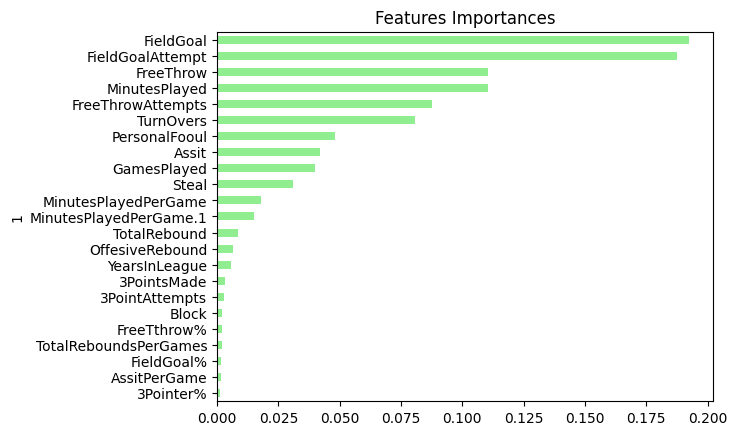

In [23]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)